# 1. Introduction


In this project I will be investigating the Boston Housing Dataset. Firstly, I will be using descriptive statistics to explore the dataset with a particular focus on whether areas near the Charles river in Boston have a higher median house price than areas farther away.

In the second section, I will use inferential statistics to analyze if there is a significant difference in median house price value between these areas.

Finally, in the last section, I will attempt to create a neural network to predict median house price value based on the other variables in the dataset. The variables in the Boston Housing dataset are displayed below.

The Boston Housing Dataset contains the following columns as per https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollar
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's
    
    

# 2. Descriptive Statistics

This section will explore and describe the dataset using descriptive statistics and plots. Please ensure you load the data as per the below section and progress from top to buttoom to ensure the code is going to run properly. 

## 2.1 Importing packages and loading the dataset

In [1]:
#please run this to import the necessary packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from scipy import stats

#load dataset
boston_data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

print()
print("Thank you!")


Thank you!


The data will be loaded into a pandas DataFrame. A DataFrame is useful being a "Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)" (1). Being size-mutable means that the structure will allow you to append / delete elements. A DataFrame also allows for heterogeneous data, which means that it can include a variety of data types like strings, integers and floats. Additionally, the labeled axes are useful for plots and to slice and understand the dataset.

Below is a quick summary of the packages used in this notebook: 

**NumPy** – “the fundamental package for numerical computation. It defines the numerical array and matrix types and basic operations on them.” (2) http://www.numpy.org/

**Matplotlib** – “a mature and popular plotting package, that provides publication-quality 2D plotting as well as rudimentary 3D plotting” (2) https://matplotlib.org/

**Seaborn** – “a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.”(3) https://seaborn.pydata.org/

**Pandas** – “providing high-performance, easy to use data structures.” (2) http://pandas.pydata.org/

**SciPy Library** – “a collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics and much more.” (2) https://www.scipy.org/scipylib/index.html


### References

(1) https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

(2) https://www.scipy.org/about.html

(3) https://seaborn.pydata.org/

## 2.2 Sizing up the dataset

As a first step, let us have a look at the dataset we are dealing with.

I used the .shape command to show me how many rows and columns the dataset has - 506 rows and 14 columns. .dropna allows me to delete rows with missing values and as I run the .shape command again, I can see that no rows were deleted - hence the dataset did not contain any missing values.

In [2]:
boston_data.shape # outputs number of rows and columns

(506, 14)

In [3]:
boston_data.dropna() #cleanup: delete rows with missing values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
boston_data.shape # outputs number of rows and columns

(506, 14)

## 2.3 Exploring the Boston Housing Dataset using descriptive Statistics

The dataset contains exclusively numeric data, with the exception of column "chas" that is categorical and denotes location by the river with a 1 or 0. Integers and floats are spread across 14 columns and 506 rows, as shown above by the .shape command. This is a large amount of data, so at a glance it is not possible to draw any useful information from it. 

The Python packages include many useful commands that allow to use descriptive statistic operations on the dataset. This will allow to break down the dataset and single out attributes that stand out, for example because they seem to correlate with one another. 

In [5]:
boston_data.describe() #stats overview

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
boston_data.corr() # returns correlation between columns

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


The above table shows that there appear to be come strong correlations in the datasets, notably a strong negative correlation between **LSTAT - % lower status of the population** and **MEDV - Median value of owner-occupied homes in $1000's**

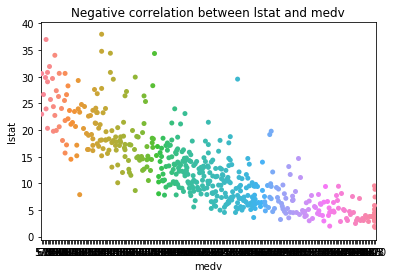

In [7]:
sb.swarmplot(x='medv', y='lstat', data=boston_data)
plt.title('Negative correlation between lstat and medv')
plt.show()

As can be seen above, unsurpisingly, the areas with a higher percentage of lower status of population have a lower median house price. 

## 2.4 Descriptive statistics: Spotlight on river location

In the second part of this workbook it will be analysed whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. Therefore, let us look more closely at the column "chas" (categorical value 1/0 that denotes whether the property is by the river) and "medv" (house price).

Swarmplots are a useful tool to get a look at the data. Every dot denotes a datapoint. I have decided to include the rooms as a variable in below swarmplot as we can assume from general knowledge that houseprices tend to increase with the amount of rooms they have. The below is very interesting. Firstly, not in line with my assumption, the number of rooms does not seem to correlate strongly with the house value. By looking at the above correlation matrix, we can see that the correlation is indeed 0.695, which denotes a positive correlation, however it might be argued whether this correlation is significant. It is also worth noting that the number of rooms seems to be well distributed. In comparison to the correlation between the river location and the number of rooms is insignificant, it is 0.091 and you can tell from the plot below, that the orange dots are scattered. 

Most notacibly however, we can see very few orange dots. We can use the .value_counts() function to retrieve how many unique values we have in a column and this shows that the dataset of 506 rows only includes 35 properties by the river. This is a strong minority compared to the multitude of datapoints we have for non-river properties. I am also taking this opportunity to create two separate datasets "by_river" and "not_river" to simplify analysis.

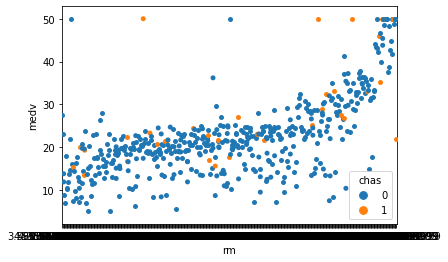

In [8]:
sb.swarmplot(x='rm', y='medv', hue = 'chas', data=boston_data)

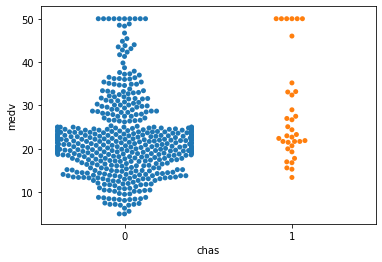

In [9]:
sb.swarmplot(x='chas', y='medv', data=boston_data)

There look to be very few houses by the river - indicated by "1". Let's confirm the ratio and run some stats on the individual datasets.

In [10]:
boston_data['chas'].value_counts() #count unique values

0    471
1     35
Name: chas, dtype: int64

In [11]:
#separate datasets out
by_river = boston_data[boston_data['chas']==1]
not_river = boston_data[boston_data['chas']==0] 

Repeating commands we have already used on the dataset as a whole, I now want to see if I can spot any stark difference.

In [12]:
by_river.describe() #get a stats overview

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.851670,7.714286,12.719143,1.0,0.593426,6.519600,77.50000,3.029709,9.314286,386.257143,17.491429,372.997429,11.241714,28.440000
std,2.494072,18.800143,5.957623,0.0,0.144736,0.876416,22.02134,1.254728,8.248962,165.012004,2.081766,53.382820,6.686651,11.816643
min,0.015010,0.000000,1.210000,1.0,0.401000,5.012000,24.80000,1.129600,1.000000,198.000000,13.600000,88.010000,1.920000,13.400000
25%,0.125060,0.000000,6.410000,1.0,0.489000,5.935500,60.30000,1.904700,4.000000,276.000000,15.650000,376.200000,5.395000,21.100000
50%,0.447910,0.000000,13.890000,1.0,0.550000,6.250000,88.50000,3.048000,5.000000,307.000000,17.600000,390.770000,10.500000,23.300000
75%,3.397665,0.000000,18.100000,1.0,0.693000,6.915000,93.20000,3.897300,8.000000,403.000000,18.600000,393.595000,15.070000,33.150000
max,8.982960,90.000000,19.580000,1.0,0.871000,8.780000,100.00000,5.885000,24.000000,666.000000,20.200000,396.900000,26.820000,50.000000


In [13]:
not_river.describe() #get a stats overview

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,471.000000,471.000000,471.000000,471.0,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3.744447,11.634820,11.019193,0.0,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,355.461040,12.757941,22.093843
std,8.876818,23.617979,6.913850,0.0,0.113102,0.685895,28.458924,2.145567,8.748452,168.853790,2.155958,93.423542,7.169271,8.831362
min,0.006320,0.000000,0.460000,0.0,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079640,0.000000,5.040000,0.0,0.448000,5.882000,42.500000,2.105250,4.000000,282.500000,17.400000,375.365000,7.160000,16.600000
50%,0.245220,0.000000,8.560000,0.0,0.538000,6.202000,76.500000,3.215700,5.000000,330.000000,19.100000,391.830000,11.380000,20.900000
75%,3.695030,12.500000,18.100000,0.0,0.624000,6.594000,94.100000,5.287300,24.000000,666.000000,20.200000,396.375000,17.095000,24.800000
max,88.976200,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


A quick comparison across the board shows that the river estates cost more on average, despite having roughly the same average of rooms. It appears estates by the river average an older age. Interestingly, the tax appears to be lower. However, considering that we have much less data available for the river estates, it is more difficult to judge validity of these claims.

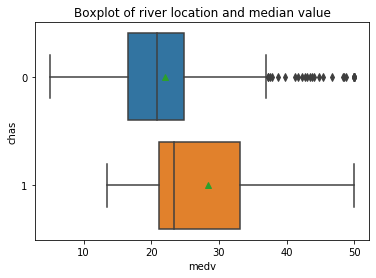

In [14]:
sb.boxplot(data = boston_data, x='medv', y='chas', orient = 'h', showmeans=True)
plt.title('Boxplot of river location and median value')
plt.show()

While it does appear that is there some difference in house prices by the river and not by the river, i will investigate if this is statistically significant in the next section on inferential statistics. 

# 3. Inferential Statistics


It appears by looking at the outcome of the descriptive analysis in Part 1 that houses by the river are more expensive than houses not by the river. However, we have also established that the pool of data for houses by the river is significantly smaller. This brings the question whether this is a fair assumption to make or whether we simply do not have enough data points for properties by the river to confidentlty make this assumption. Inferential statistics allows to make inferences about the population from sample data and should help us understand if the differences observed are statistically relevant.(4)

Judging by the above, one would expect that in Boston the more expensive parts of the city tend to be besides the Charles river. The Charles river is the major river in Boston, it runs past Harvard university and MIT, therefore my hypothesis is that this is more expensive.



### References
(4) https://towardsdatascience.com/inferential-statistics-for-data-science-b0075670fc8a


## 3.1 Determining significance of river location for median house price

The first method I am looking at is a t-test, also known as Student's t-test. This aims to judge whether two means are from different populations. The more significant the difference, the less likely it is that the difference has occured by chance in your sample data. If the outcome of the t-test, the pvalue is lower than 0.05, we can reject the null hypothesis ("there is no difference") and accept our hypothesis that house prices near the river are more expensive.



In [15]:
import scipy.stats as ss # using scipy to perform the t test
import numpy as np
import seaborn as sb

In [16]:
ss.ttest_ind(by_river.medv,not_river.medv)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

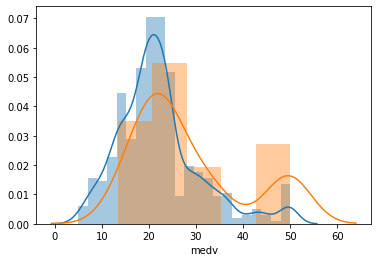

In [17]:
sb.distplot(not_river.medv)
sb.distplot(by_river.medv)

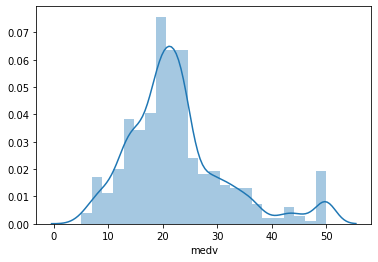

In [18]:
sb.distplot(boston_data.medv)

The pvalue for the t-test is below 0.05. Therefore, we can reject the null hypothesis and state that there appears to be a significant difference in the average house price based on whether the area is near the river. 

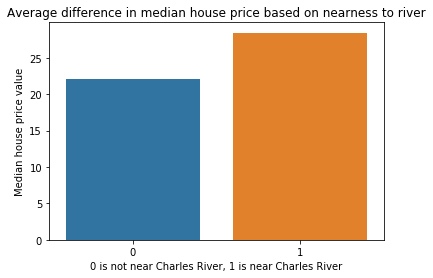

In [19]:
sb.barplot(data = boston_data, x='chas', y='medv', ci=None)
plt.title('Average difference in median house price based on nearness to river')
plt.xlabel("0 is not near Charles River, 1 is near Charles River")
plt.ylabel("Median house price value")
plt.show()

In [20]:
(np.mean(by_river.medv) - np.mean(not_river.medv)) * 1000 # There is a difference in mean house price value of $6,346 dollars.

6346.157112526519

However the swarmplots above show that there appear to be a large cluster of datapoints on the higher end for both areas. The boxplots also show outliers on the not by the river data. 

The median may be a better representation of the MEDV value, as it is not as affected by extreme values and outlers. 

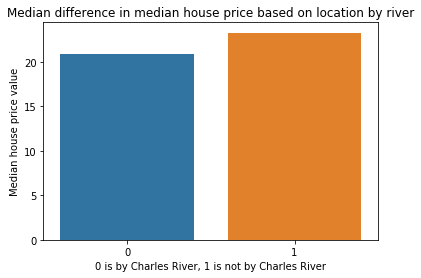

In [21]:
sb.barplot(data = boston_data, x='chas', y='medv', ci=None, estimator=np.median)
plt.title('Median difference in median house price based on location by river')
plt.xlabel("0 is by Charles River, 1 is not by Charles River")
plt.ylabel("Median house price value")
plt.show()

In [22]:
(np.median(by_river.medv) - np.median(not_river.medv)) * 1000

2400.0000000000023

We can see, the median difference is much less at $2400. 

Therefore, we can conclude that, while there is a significant difference in median house price between areas near and not near the Charles River in Boston, it is not large. 

# 4. Predict median house prices

## 4.1 Neural Networks

In this section I will use keras to create and train a neural network to predict housing prices based on the other variables in the dataset. Keras is a deep learning library for Python, which prides itself in its ease of use and runs on a TensorFlow backend. (5) TensorFlow is an end-to-end open source platform for machine learning. (6)

Two areas are key to producing a useful neural network: 
- Process Data for input into the network
- Build of the network: Layers, activation functions and optimization

We will be exploring ways to use Python to achieve the above below. Firstly, I want to present a very simple neural network to introduce keras and so that we can compare it to a more refined neural network.


The key elements of a neural network are shown in the following code cells and outlined below (7):

- **Neuron** a neuron takes in inputs, applies a **weight** and a **bias** to them. It sums them up, then applies an **activation function** and gives one output.


- **activation function** a linear function like below, does not chnge the neuron output. Others like tanh and sigmoid reduce it to be netween 0 and 1. You may need to do this incase **layers** large outputs dominate other neurons. 


- **layers** There are three layers of neurons below. The input layer, one hidden layer and the output layer which must have the same number of neurons as outputs you want. In a **dense** layer, all outputs from the previous layer go into each neuron of the next.


- **loss** and **optimizer** The lose function calculates the difference between the neural network output and the known output. The optimizer uses the difference between the loss and known output to change the weights and biases in the network to make them more accurate.


- The number of times the entire input data goes through the network is the number of **epochs**. The batch size is the number samples put through the network before the optimizer changes the weights and biases (8) The more the data is passed through, the more the optimizer will reduce the loss untill, hopefully, the neural network's outputs will match the known output. 


### References

(5) https://keras.io/


(6) https://www.tensorflow.org/


(7) https://pathmind.com/wiki/neural-network


(8) https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network

## 4.2 Creating a basic neural network with Keras

Firstly, we split the data into the predictor inputs and the output . We want to use the input variables to predict median house price value. Afterwards, we create a neural network with Keras and add layers to it, to keep it simple, layers are added with activation function linear. Then we compile and fit the network with our input and output data. However, when the network is used to predict using the inputs, the results are way off the expected outputs. In the next section, I will explore ways in which to customize the neural network and, hopefully, make it more accurate.

In [23]:
#Before we start, please ensure all libraries are imported
import keras as kr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre
import seaborn as sb

#load dataset
boston_data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

by_river = boston_data[boston_data['chas']==1]
not_river = boston_data[boston_data['chas']==0] 

Using TensorFlow backend.


In [24]:
#create inputs and outputs from the dataset at hand
outputs_raw = boston_data['medv']
inputs_raw = boston_data[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'chas']]

In [25]:
#create a new neural network
nn = kr.models.Sequential()

#add layers
nn.add(kr.layers.Dense(10, input_dim=13, activation = "linear")) #input dimenson = number of columns
nn.add(kr.layers.Dense(10, activation = "linear"))
nn.add(kr.layers.Dense(1, activation = "linear"))
nn.compile(loss="mean_squared_error", optimizer="adam")

In [26]:
nn.fit(inputs_raw, outputs_raw, epochs=200,batch_size=10)

Epoch 1/200
506/506 [==============================] - 1s 1ms/step - loss: 1233.2229
Epoch 2/200
506/506 [==============================] - 0s 272us/step - loss: 91.6775
Epoch 3/200
506/506 [==============================] - 0s 263us/step - loss: 83.2432
Epoch 4/200
506/506 [==============================] - 0s 263us/step - loss: 81.8329
Epoch 5/200
506/506 [==============================] - 0s 260us/step - loss: 79.8305
Epoch 6/200
506/506 [==============================] - 0s 255us/step - loss: 84.3989
Epoch 7/200
506/506 [==============================] - 0s 231us/step - loss: 87.4702
Epoch 8/200
506/506 [==============================] - 0s 255us/step - loss: 80.2623
Epoch 9/200
506/506 [==============================] - 0s 285us/step - loss: 78.0539
Epoch 10/200
506/506 [==============================] - 0s 288us/step - loss: 74.4736
Epoch 11/200
506/506 [==============================] - 0s 250us/step - loss: 77.8293
Epoch 12/200
506/506 [==============================] - 0s 273u

506/506 [==============================] - 0s 231us/step - loss: 37.6198
Epoch 97/200
506/506 [==============================] - 0s 266us/step - loss: 39.2199
Epoch 98/200
506/506 [==============================] - 0s 464us/step - loss: 40.9441
Epoch 99/200
506/506 [==============================] - 0s 229us/step - loss: 36.6396
Epoch 100/200
506/506 [==============================] - 0s 278us/step - loss: 35.6215
Epoch 101/200
506/506 [==============================] - 0s 394us/step - loss: 39.9351
Epoch 102/200
506/506 [==============================] - 0s 399us/step - loss: 38.6789
Epoch 103/200
506/506 [==============================] - 0s 364us/step - loss: 37.5289
Epoch 104/200
506/506 [==============================] - 0s 293us/step - loss: 40.6085
Epoch 105/200
506/506 [==============================] - 0s 235us/step - loss: 37.9378
Epoch 106/200
506/506 [==============================] - 0s 378us/step - loss: 36.6700
Epoch 107/200
506/506 [==============================] - 0s 

506/506 [==============================] - 0s 215us/step - loss: 27.7260
Epoch 191/200
506/506 [==============================] - 0s 224us/step - loss: 28.2561
Epoch 192/200
506/506 [==============================] - 0s 261us/step - loss: 27.7786
Epoch 193/200
506/506 [==============================] - 0s 273us/step - loss: 28.4005
Epoch 194/200
506/506 [==============================] - 0s 190us/step - loss: 28.2309
Epoch 195/200
506/506 [==============================] - 0s 249us/step - loss: 31.6053
Epoch 196/200
506/506 [==============================] - 0s 244us/step - loss: 34.1351
Epoch 197/200
506/506 [==============================] - 0s 229us/step - loss: 29.1258
Epoch 198/200
506/506 [==============================] - 0s 242us/step - loss: 29.2220
Epoch 199/200
506/506 [==============================] - 0s 341us/step - loss: 43.7897
Epoch 200/200
506/506 [==============================] - 0s 298us/step - loss: 35.5815


Below, the nn outputs are subtracted from the known outputs. As you can see there is a large difference between both, so this neural network is not accurate. 

In [27]:
np.round(nn.predict(inputs_raw).T - outputs_raw.as_matrix())

C:\Users\sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[  5.,   3.,  -4.,  -3.,  -7.,  -2.,  -2., -10.,  -8.,  -2.,   2.,
          1.,  -4.,   2.,   4.,   2.,   0.,   2.,  -3.,   3.,   1.,   1.,
          3.,   2.,   3.,   1.,   2.,   2.,   4.,   3.,   1.,   6.,  -4.,
          3.,   1.,   5.,   2.,   2.,  -2.,   1.,   0.,   1.,  -1.,  -1.,
          1.,   2.,  -1.,   1.,  -7.,  -3.,   0.,   3.,   2.,  -0.,  -1.,
         -2.,   2.,   1.,   0.,   3.,   1.,   4.,   4.,  -0.,  -7.,   5.,
          4.,  -1.,  -1.,  -0.,  -0.,  -2.,   1.,  -1.,  -1.,   0.,   0.,
         -0.,  -2.,  -0.,   1.,   4.,   1.,   2.,   1.,   1.,  -1.,   3.,
          7.,   2.,   4.,   5.,   5.,   3.,   5.,  -1.,   2.,  -4., -10.,
         -2.,  -2.,   0.,  -1.,   2.,   2.,  -0.,  -2.,   1.,   4.,   1.,
         -0.,   2.,  -0.,  -0.,   5.,  -1.,   0.,   3.,  -3.,  -1.,  -0.,
          2.,  -0.,  -2.,   2.,   1.,  -2.,   1.,   3.,   1.,   3.,   2.,
         -1.,  -1.,  -2.,   1.,  -0.,   4.,   2.,   0.,   0., -10.,   2.,
         -4.,  -4.,  -5.,  -2.,  -7., 

Below a quick check to understand how far off the expected output the newly generated output of the neural network is.

In [29]:
#calculation to see how different two arrays are
#as per Ian ) #transpose - #turn pandas data series into numpy array to be able to subtractMcLoughlin https://github.com/ianmcloughlin/datasets/blob/master/dogs.csv
np.sqrt(np.sum(nn.predict(inputs_raw).T - outputs_raw.as_matrix())**2)

C:\Users\sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


577.4437443971634

##  4.3 Pre-processing

Above you can see different ways to re-write your data in whichever data format works best for the occassion. When presenting or handing data over to the business, it might make sense to recode some 0 and 1s to text as that is more intuitive for the human eye - especially if they do not have a science background. For our purposes however, creating a neural network, it will be easier to deal with numeric values 0 and 1s. Generally, it makes sense to create new columns rather than amending the original dataset to avoid issues down the line.

In [ ]:
#playing around with making the dataset more usable by changing values into different datatypes
#2 ways:

#https://stackoverflow.com/questions/42788713/pandas-mapping-to-true-false-as-string-not-boolean
booleanDictionary = {1: 'TRUE', 0: 'FALSE'}

#adding new column copying chas
boston_data['by_River'] = boston_data['chas'].astype(np.int)
#replacing it with boolean values to show text
boston_data['by_River'] = boston_data['chas'].replace(booleanDictionary)

#adding two columns for is_by_river and is_not_by_river
boston_data['is_by_river'] = (boston_data['chas'] == 1).astype(np.int)
boston_data['is_not_by_river'] = (boston_data['chas'] == 0).astype(np.int)

boston_data.head()

In [ ]:
#create inputs and outputs by pulling the columns we want to look at

outputs = boston_data['medv']
inputs = boston_data[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'is_by_river', 'is_not_by_river']]


In order to make the neural network more accurate it is crucial to work with the data at hand. There is no one-size-fits-all but in general it is a good idea to pre-process the data. Two common methods for pre-processing is standardization and whitening. 

Standardization
As the sklearn documentation (1) outlines, "Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation." 

We can see below, how applying the sklearn scale method to the input data centers it around 0. Note: this is only going to work for numeric values.


(1) https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
#split dataset into train and test subsets
#move this up

import sklearn.model_selection as mod

inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

Since we are altering the data we work with, it is good practise to capture the values used for scaling to have a record and to be able to replicate on new data if needed. The sklearn documentation provides guidance on how to do this:

In [ ]:
#store scaling info in variable as per https://scikit-learn.org/stable/modules/preprocessing.html
scaler = pre.StandardScaler()
scaler.fit(inputs_train)
#to replicate use scaler.transform(x)

In [ ]:
#scale inputs and store in new variable
inputs_pre = pd.DataFrame(pre.scale(inputs_train), columns=inputs_train.columns)

The above code creates a new variable inputs_pre and stores in it a scaled Pandas Dataframe of the inputs. Below I am printing the new mean and standard deviation of the dataset and we can see that the mean is now almost 0, the standard deviation almost 1.  This step was successful.

In [ ]:
#verify means are close to 0
inputs_pre.mean()

In [ ]:
#verify standard deviation approaching 1
inputs_pre.std()

In [ ]:
#create a new neural network

m = kr.models.Sequential()

#add a layer
m.add(kr.layers.Dense(10, input_dim=14, activation = "linear"))
m.add(kr.layers.Dense(10, activation = "linear"))
m.add(kr.layers.Dense(1, activation = "linear"))
m.compile(loss="mean_squared_error", optimizer="adam")
m.fit(inputs_pre, outputs_train, epochs=300,batch_size=10)

Whitening: 
While standardization looks at the variables individually, whitening tackles the correlation between variables and removes it. Additionally, whitening will also standardize each of the columns. Therefore, if you choose to whiten your dataset, there is no need to standardize it separately.

In [ ]:
import sklearn.decomposition as dec

pca = dec.PCA(n_components=14, whiten=True)
pca.fit(inputs_train)
whitened_inputs = pd.DataFrame(pca.transform(inputs_train), columns=inputs_train.columns)
whitened_inputs

In [ ]:
whitened_inputs_test = pd.DataFrame(pca.transform(inputs_test), columns=inputs_test.columns)
m.predict(whitened_inputs_test)
np.sqrt(np.sum(m.predict(whitened_inputs_test).T - outputs_test.as_matrix())**2)

In [ ]:
#create a new neural network

m = kr.models.Sequential()

#add a layer
m.add(kr.layers.Dense(10, input_dim=14, activation = "linear"))
#m.add(kr.layers.Dense(60, activation = "tanh"))
m.add(kr.layers.Dense(60, activation = "tanh"))
m.add(kr.layers.Dense(20, activation = "tanh"))
m.add(kr.layers.Dense(30, activation = "relu"))
m.add(kr.layers.Dense(10, activation = "linear"))
m.add(kr.layers.Dense(10, activation = "linear"))
m.add(kr.layers.Dense(1, activation = "linear"))
m.compile(loss="mean_squared_error", optimizer="adam")
m.fit(whitened_inputs, outputs_train, epochs=200,batch_size=10)

In [ ]:
whitened_inputs_test = pd.DataFrame(pca.transform(inputs_test), columns=inputs_test.columns)
m.predict(whitened_inputs_test)
np.sqrt(np.sum(m.predict(whitened_inputs_test).T - outputs_test.as_matrix())**2) 

I am noticing that both whitening and standardization bring down the losses, however none of the two seems significantly more effective in doing so.

# 5. Conclusion

In section 2. of this notebook, I have used descriptive statistics to explore the Boston Housing Dataset. WIth a look to the river location the data seemed to suggest that there is a connection between a location close to the river and a higher house price. In section 3. I have performed a ttest to determine whether or not the price difference is statistically relevant, taking into account outliers and looking at the median value the hypothesis seems to hold true that houses by the river are more expensive. In the final section, 4., I have created a neural network using Keras to predict house prices based on the Boston Housing dataset. I have shown that while a simple neural network can be created, it will not work in accurately predicting house prices. Using pre-processing methods, I have compared standardization and whitening, experimented with the layers and activation functions and was able to create a more accurate neural network. It also appeared that for this dataset it did not matter whether I used standardization or whitening as a pre-processing method, both worked equally well in improving the results.